# Investigating Health Stroke Dataset

#### Done by:
1. Mohammed Alsahi
2. Omar Alshaikh
3. Rayan Raffah
4. Abdullah Almutairi
5. Omar Alshalawi


### Objective:
The objective of this project is to develop a predictive model that can identify patients who are at high risk of suffering a stroke. The analysis will involve various factors such as age, gender, average glucose level, BMI, and smoking status, among others, using data sourced from a Kaggle dataset.

### Task
To achieve the objective and goal of the project, the following tasks will be performed:

1. Discovery: Select a relevant dataset that supports the topic of interest and the objectives of the analysis.
2. Data Preparation: Read the selected data, list the fields/variables, identify their types, and fix inconsistencies, impute missing data, and remove outliers.
3. Model Planning: Run exploratory data analysis, find statistical summaries, make univariate and bivariate graphs, and assess the relationship between variables. Choose a suitable modeling technique for the successful achievement of objectives and provide justification.
4. Model Building: Estimate unknown model parameters and evaluate the model using validation/cross-validation. Compare different models based on performance measures and interpret the findings.
5. Operationalize: Provide general guidelines to adopt the methodology, list problems and issues in the implementation of the selected methodology.
6. Communicate Results: Provide a summary and conclusion of the analysis and give possible future recommendations.

# 2. Data Preparation:

In [1]:
# part a 
import pandas as pd
df = pd.read_csv('dataSet\health-stroke.csv') #Read the selected data

df.iloc[25:37] # did not ask about it

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
25,70822,Male,80.0,0,0,Yes,Self-employed,Rural,104.12,23.5,never smoked,1
26,38047,Female,65.0,0,0,Yes,Private,Rural,100.98,28.2,formerly smoked,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
28,54827,Male,69.0,0,1,Yes,Self-employed,Urban,195.23,28.3,smokes,1
29,69160,Male,759.0,0,0,Yes,Private,Rural,211.78,NaN,formerly smoked,1
30,43717,Male,57.0,1,0,Yes,Private,Urban,212.08,44.2,smokes,1
31,33879,Male,42.0,0,0,Yes,Private,Rural,83.41,25.4,Unknown,1
32,39373,Female,82.0,1,0,Yes,Self-employed,Urban,196.92,22.2,never smoked,1
33,54401,Male,80.0,0,1,Yes,Self-employed,Urban,252.72,30.5,formerly smoked,1
34,14248,Male,48.0,0,0,No,Govt_job,Urban,84.20,29.7,never smoked,1


In [2]:
print(df.columns)  # list the fields/variables


Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [3]:
display(df.info()) # Identify the fields of the data
#age should be int and postive 
#id should be string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 431 non-null    int64  
 1   gender             431 non-null    object 
 2   age                431 non-null    float64
 3   hypertension       431 non-null    int64  
 4   heart_disease      431 non-null    int64  
 5   ever_married       431 non-null    object 
 6   work_type          431 non-null    object 
 7   Residence_type     431 non-null    object 
 8   avg_glucose_level  431 non-null    float64
 9   bmi                389 non-null    float64
 10  smoking_status     431 non-null    object 
 11  stroke             431 non-null    int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 40.5+ KB


None

# 2. Data Preparation:

In [4]:
# part b 


df.isnull().sum()

#bmi has N/A ---> Incomplete and also must to be postive 


id                    0
gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  42
smoking_status        0
stroke                0
dtype: int64

In [5]:
# some ages entered by mistake with this form 0.64 which means 64 --> inconsistency
df['age'] = df['age'].apply(lambda x: int(x * 100) if (x < 1 and x > 0) else int(abs(x))) 
df['id'] = df['id'].apply(str)
df.info()
df.iloc[340:371] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 431 non-null    object 
 1   gender             431 non-null    object 
 2   age                431 non-null    int64  
 3   hypertension       431 non-null    int64  
 4   heart_disease      431 non-null    int64  
 5   ever_married       431 non-null    object 
 6   work_type          431 non-null    object 
 7   Residence_type     431 non-null    object 
 8   avg_glucose_level  431 non-null    float64
 9   bmi                389 non-null    float64
 10  smoking_status     431 non-null    object 
 11  stroke             431 non-null    int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 40.5+ KB


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
340,10449,Female,24,0,0,Yes,Private,Urban,75.23,29.0,never smoked,0
341,38805,Female,37,0,0,Yes,Private,Rural,75.18,48.2,formerly smoked,0
342,31091,Male,34,0,1,Yes,Private,Urban,106.23,NaN,formerly smoked,0
343,45053,Male,64,0,0,Yes,Govt_job,Urban,239.64,34.6,formerly smoked,0
344,61837,Female,66,0,0,Yes,Self-employed,Urban,58.95,24.6,never smoked,0
345,9487,Female,23,0,0,No,Private,Urban,99.92,25.8,never smoked,0
346,49713,Male,68,0,0,Yes,Private,Rural,116.23,26.1,never smoked,0
347,17608,Female,55,0,0,Yes,Govt_job,Urban,118.82,29.0,formerly smoked,0
348,28102,Female,25,0,0,No,Private,Rural,66.30,27.2,never smoked,0
349,1506,Female,48,0,0,No,Govt_job,Urban,101.41,20.7,smokes,0


In [6]:
null_columns=df.columns[df.isna().any()]
print('Columns with NaN values are:', null_columns)

Columns with NaN values are: Index(['bmi'], dtype='object')


In [7]:
for c in null_columns:
    if df[c].dtype!='object':
        value = df[c].mean()
    else:
        value = df[c].mode()
        value = value[0]  
    df[c].fillna(value,inplace=True)

df['bmi'] = df['bmi'].apply(lambda x : format(x,".2f")).astype(float) # round it to 2 dicmal instead of 4 ..
df.info()

df.iloc[340:371] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 431 non-null    object 
 1   gender             431 non-null    object 
 2   age                431 non-null    int64  
 3   hypertension       431 non-null    int64  
 4   heart_disease      431 non-null    int64  
 5   ever_married       431 non-null    object 
 6   work_type          431 non-null    object 
 7   Residence_type     431 non-null    object 
 8   avg_glucose_level  431 non-null    float64
 9   bmi                431 non-null    float64
 10  smoking_status     431 non-null    object 
 11  stroke             431 non-null    int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 40.5+ KB


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
340,10449,Female,24,0,0,Yes,Private,Urban,75.23,29.00,never smoked,0
341,38805,Female,37,0,0,Yes,Private,Rural,75.18,48.20,formerly smoked,0
342,31091,Male,34,0,1,Yes,Private,Urban,106.23,30.29,formerly smoked,0
343,45053,Male,64,0,0,Yes,Govt_job,Urban,239.64,34.60,formerly smoked,0
344,61837,Female,66,0,0,Yes,Self-employed,Urban,58.95,24.60,never smoked,0
345,9487,Female,23,0,0,No,Private,Urban,99.92,25.80,never smoked,0
346,49713,Male,68,0,0,Yes,Private,Rural,116.23,26.10,never smoked,0
347,17608,Female,55,0,0,Yes,Govt_job,Urban,118.82,29.00,formerly smoked,0
348,28102,Female,25,0,0,No,Private,Rural,66.30,27.20,never smoked,0
349,1506,Female,48,0,0,No,Govt_job,Urban,101.41,20.70,smokes,0


In [8]:
#outliers ages are at row 29 and 322 


import numpy as np
selected_columns = df[['age','avg_glucose_level']] 
# Calculate IQR and bounds
Q1 = selected_columns.quantile(0.25)
Q3 = selected_columns.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier = (selected_columns < lower_bound) | (selected_columns > upper_bound)
print(outlier)# not needed 
index_row = outlier[outlier['age']].index
print(index_row)
df.drop(index_row , inplace=True)
df.iloc[25:37]

       age  avg_glucose_level
0    False              False
1    False              False
2    False              False
3    False              False
4    False              False
..     ...                ...
426  False              False
427  False              False
428  False              False
429  False              False
430  False              False

[431 rows x 2 columns]
Int64Index([29, 162, 322], dtype='int64')


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
25,70822,Male,80,0,0,Yes,Self-employed,Rural,104.12,23.50,never smoked,1
26,38047,Female,65,0,0,Yes,Private,Rural,100.98,28.20,formerly smoked,1
27,61843,Male,58,0,0,Yes,Private,Rural,189.84,30.29,Unknown,1
28,54827,Male,69,0,1,Yes,Self-employed,Urban,195.23,28.30,smokes,1
30,43717,Male,57,1,0,Yes,Private,Urban,212.08,44.20,smokes,1
31,33879,Male,42,0,0,Yes,Private,Rural,83.41,25.40,Unknown,1
32,39373,Female,82,1,0,Yes,Self-employed,Urban,196.92,22.20,never smoked,1
33,54401,Male,80,0,1,Yes,Self-employed,Urban,252.72,30.50,formerly smoked,1
34,14248,Male,48,0,0,No,Govt_job,Urban,84.20,29.70,never smoked,1
35,712,Female,82,1,1,No,Private,Rural,84.03,26.50,formerly smoked,1


# 3.Model Planning:

In [9]:
# i. Find the statistical summaries.
display(df.describe())
display(df.describe(include='object'))

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,57.703271,0.198598,0.133178,123.833178,30.306308,0.577103
std,20.783557,0.399412,0.340164,58.463039,7.321947,0.494598
min,3.000000,0.000000,0.000000,55.420000,13.800000,0.000000
25%,46.750000,0.000000,0.000000,78.775000,25.800000,0.000000
50%,61.000000,0.000000,0.000000,98.055000,30.000000,1.000000
75%,76.000000,0.000000,0.000000,179.572500,34.100000,1.000000
max,88.000000,1.000000,1.000000,271.740000,64.800000,1.000000


,id,gender,ever_married,work_type,Residence_type,smoking_status
count,428,428,428,428,428,428
unique,428,2,2,5,2,4
top,9046,Female,Yes,Private,Urban,never smoked
freq,1,260,344,256,219,158


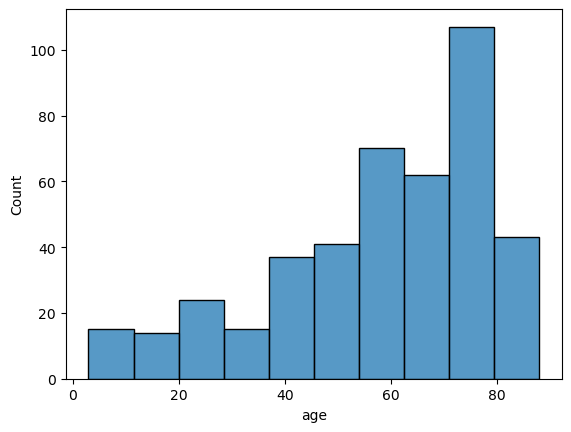

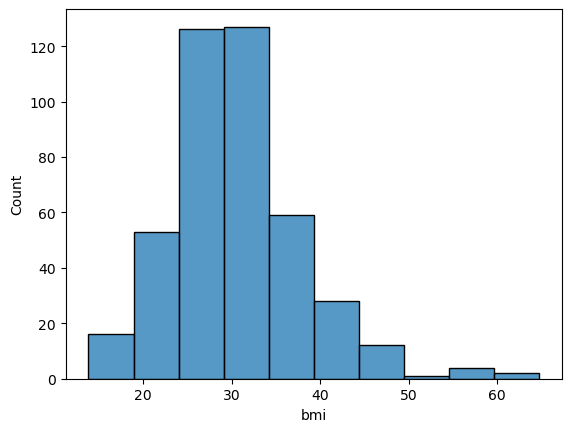

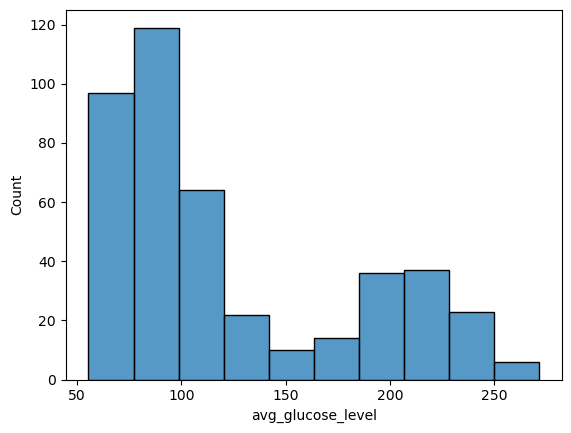

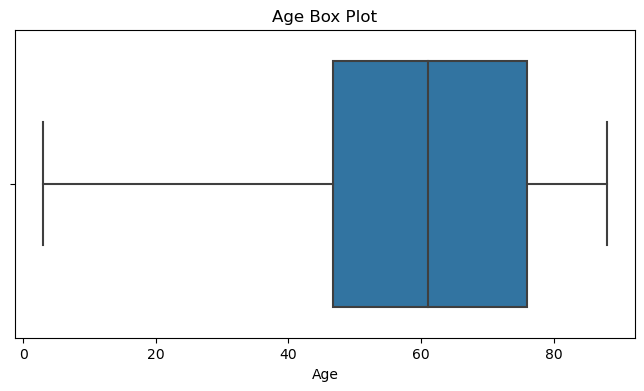

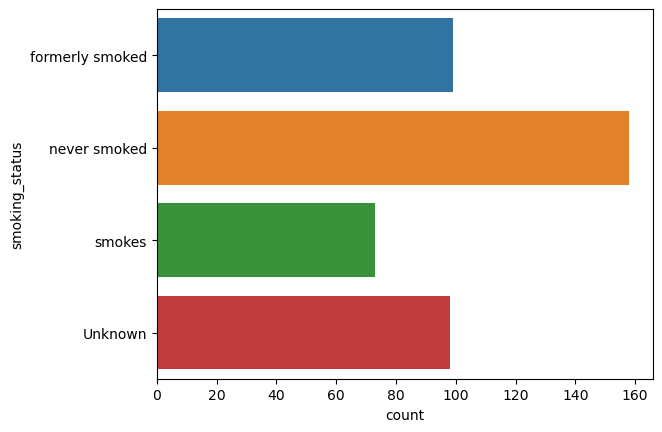

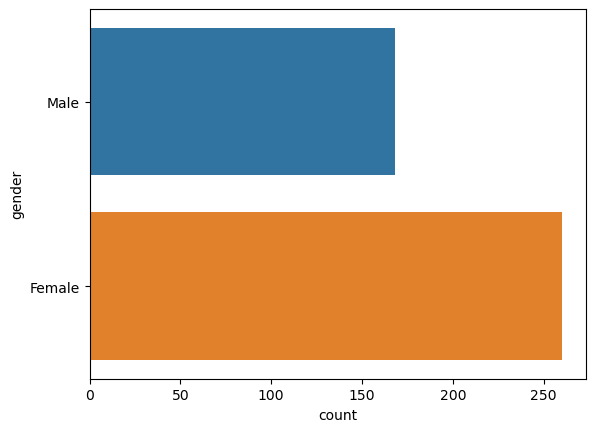

In [10]:
# ii. Make univariate graphs (i.e., graphs based on single variable).

import matplotlib.pyplot as plt
import seaborn as sns

selected_columns = df[['age','bmi','avg_glucose_level']] 

for c in selected_columns:
    plt.figure()
    sns.histplot(x=c,bins=10,data=df);
    plt.show()
    

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['age'])
plt.title('Age Box Plot')
plt.xlabel('Age')
plt.show()


selected_columns = df[['smoking_status','gender']] 

# Plot for each identified column
for a in selected_columns:
    plt.figure()
    sns.countplot(y=a,data=df);
    plt.show()
    



#### The age is concentrated between 50 and 80 while the BMI is concentrated around 30
#### The majority of reponses are with low average glucose level and number of female is exceeding number of males

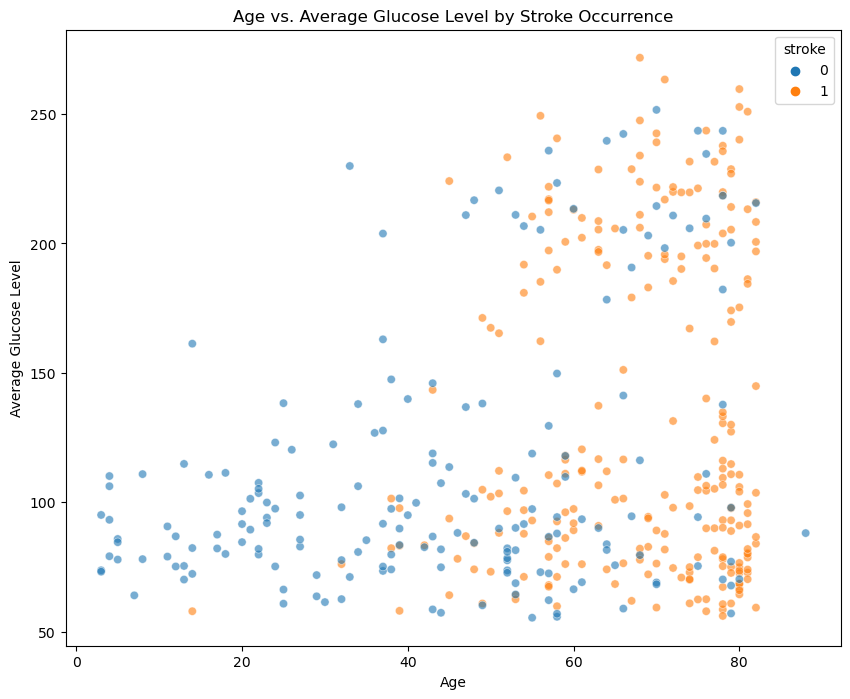

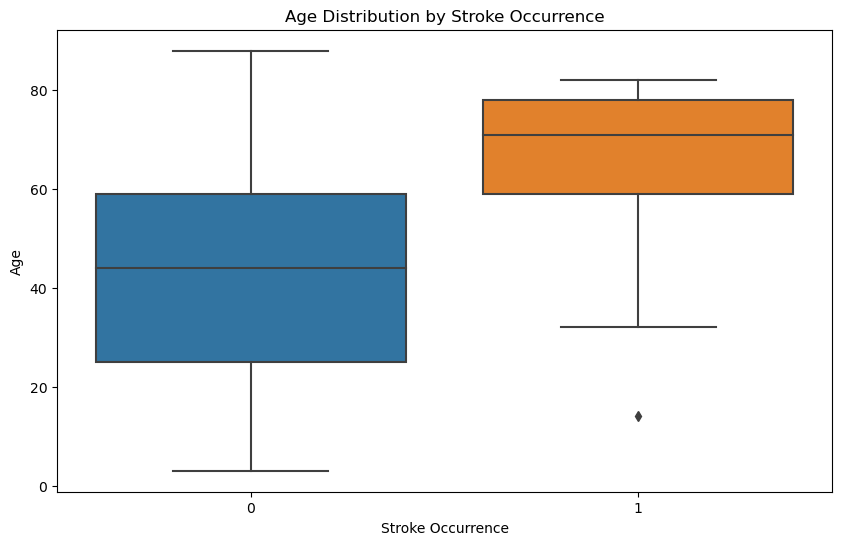

In [11]:
#iii. Prepare bivariate plots (i.e., plots based on two variables).

plt.figure(figsize=(10, 8))
sns.scatterplot(x='age', y='avg_glucose_level', hue='stroke', color='red', alpha=0.6, data=df)
plt.title('Age vs. Average Glucose Level by Stroke Occurrence')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='stroke', y='age', data=df)
plt.title('Age Distribution by Stroke Occurrence')
plt.xlabel('Stroke Occurrence')
plt.ylabel('Age')
plt.show()

#### According to the scatter plot and box plot strokes seem to occurs as age increases 

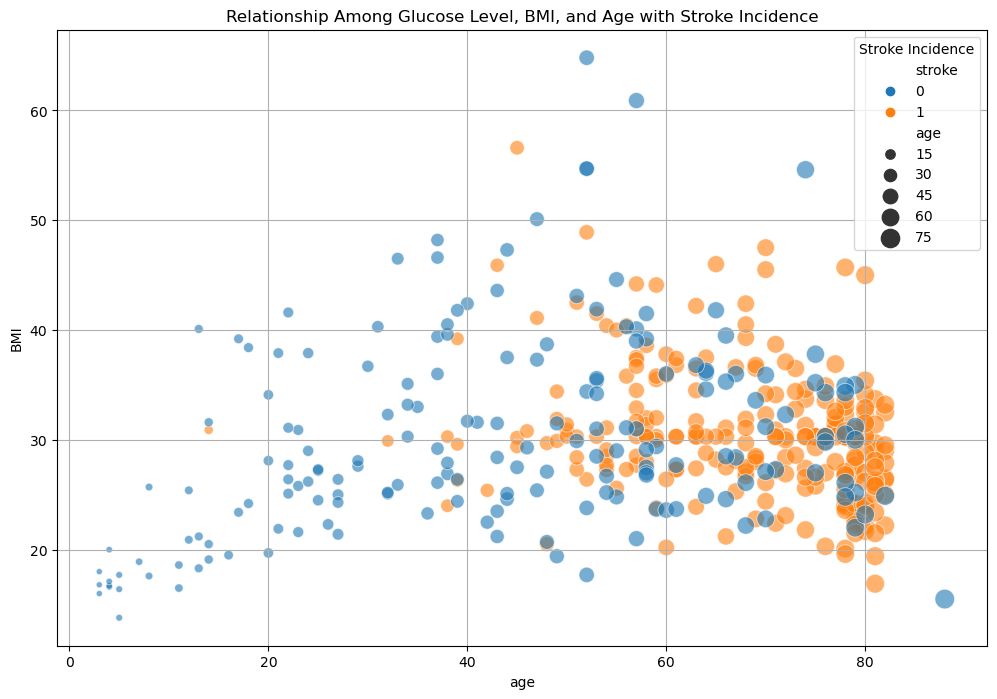

In [12]:
#iv. Portray advanced graphs (i.e., graphs based on more than two variables).

plt.figure(figsize=(12, 8))
sns.scatterplot(x='age', y='bmi', hue='stroke', size='age', sizes=(20, 200), alpha=0.6, data=df)
plt.title('Relationship Among Glucose Level, BMI, and Age with Stroke Incidence')
plt.xlabel('age')
plt.ylabel('BMI')
plt.legend(title='Stroke Incidence')
plt.grid(True)
plt.show()






####  Unlike age, the BMI index do not appeal to have a clear relationship with stroke

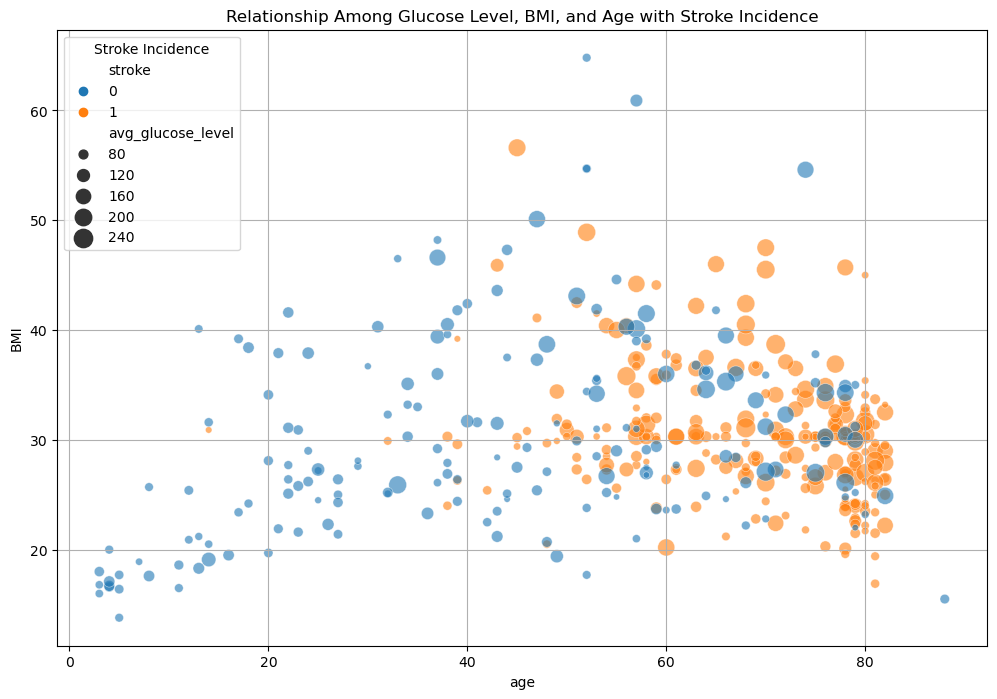

In [13]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='age', y='bmi', hue='stroke', size='avg_glucose_level', sizes=(20, 200), alpha=0.6, data=df)
plt.title('Relationship Among Glucose Level, BMI, and Age with Stroke Incidence')
plt.xlabel('age')
plt.ylabel('BMI')
plt.legend(title='Stroke Incidence')
plt.grid(True)
plt.show()


#### The majority of strokes come with high average glucose level as well elder people

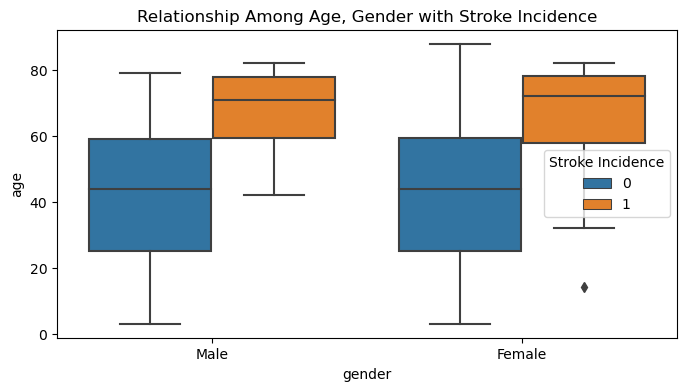

In [14]:
plt.figure(figsize=(8, 4))
plt.title('Relationship Among Age, Gender with Stroke Incidence')
sns.boxplot(x='gender', y='age', hue="stroke",data=df)
plt.legend(title='Stroke Incidence')
plt.show()

#### Stroke incidences seem to not have a relation with gender

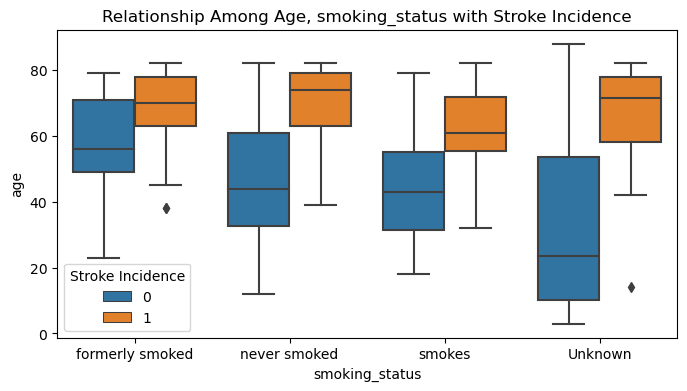

In [15]:
plt.figure(figsize=(8, 4))
plt.title('Relationship Among Age, smoking_status with Stroke Incidence')
sns.boxplot(x='smoking_status', y='age', hue="stroke",data=df)
plt.legend(title='Stroke Incidence')
plt.show()

#### From the box plots, it can be seen that smoking status does not have direct relation with stroke incidences

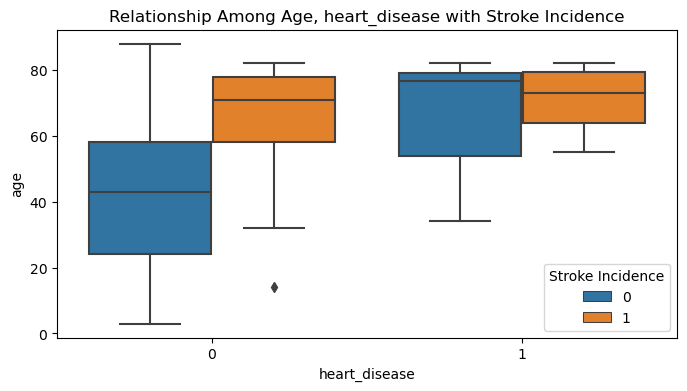

In [16]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='heart_disease', y='age', hue="stroke",data=df)
plt.title('Relationship Among Age, heart_disease with Stroke Incidence')
plt.legend(title='Stroke Incidence')
plt.show()

#### From the box plots, it can be seen that hear_disease does not have direct relation with stroke incidences

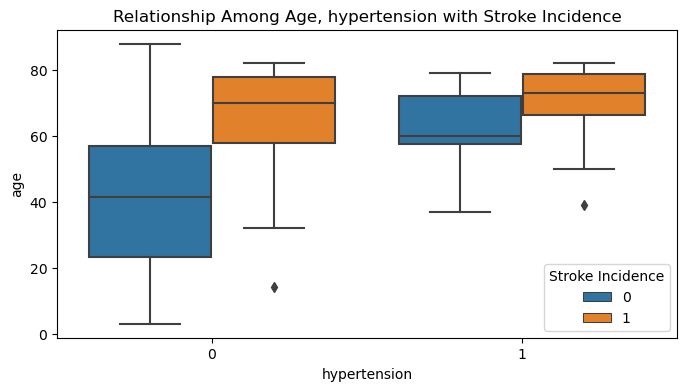

In [17]:
plt.figure(figsize=(8, 4))
plt.title('Relationship Among Age, hypertension with Stroke Incidence')
sns.boxplot(x='hypertension', y='age', hue="stroke",data=df)
plt.legend(title='Stroke Incidence')
plt.show()

#### From the box plots, it can be seen that hypertension does not have direct relation with stroke incidences

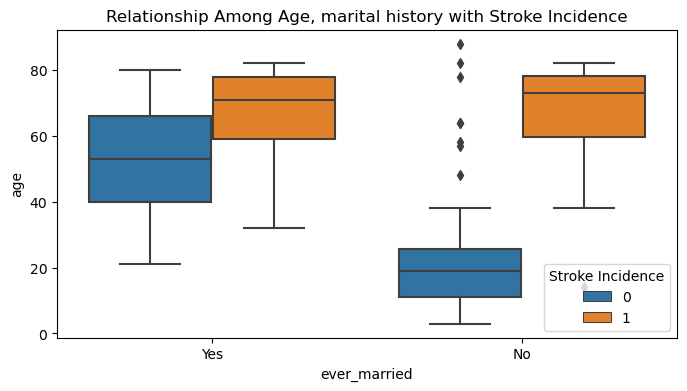

In [18]:
plt.figure(figsize=(8, 4))
plt.title('Relationship Among Age, marital history with Stroke Incidence')
sns.boxplot(x='ever_married', y='age', hue="stroke",data=df)
plt.legend(title='Stroke Incidence')
plt.show()

#### From the box plots, it can be seen that marital history does not have direct relation with stroke incidences

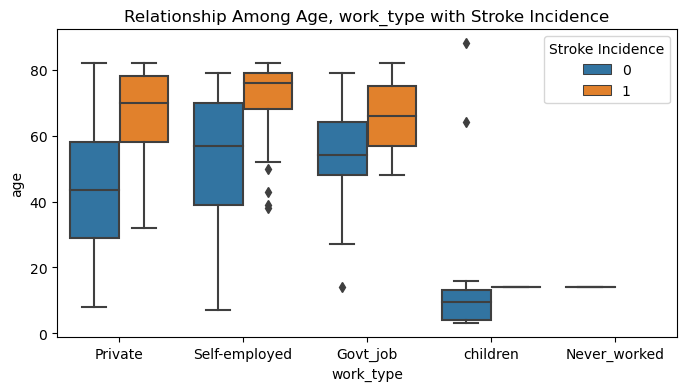

In [19]:

plt.figure(figsize=(8, 4))
plt.title('Relationship Among Age, work_type with Stroke Incidence')
sns.boxplot(x='work_type', y='age', hue="stroke",data=df)
plt.legend(title='Stroke Incidence')
plt.show()

#### From the box plots, it can be seen that people who do not work and stay at home with children tend to not have risks of getting stroke

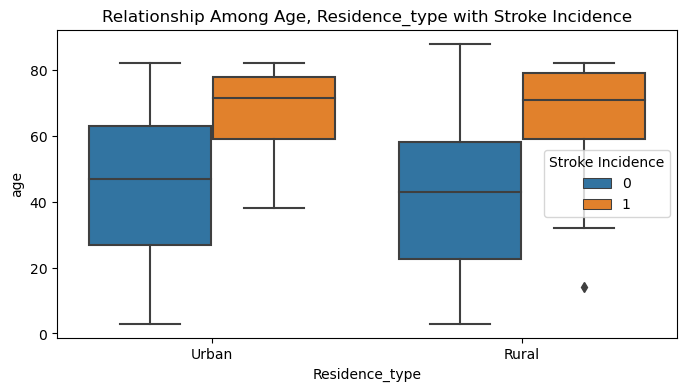

In [20]:
plt.figure(figsize=(8, 4))
plt.title('Relationship Among Age, Residence_type with Stroke Incidence')
sns.boxplot(x='Residence_type', y='age', hue="stroke",data=df)
plt.legend(title='Stroke Incidence')
plt.show()

## From the box plots, it can be seen that Residence_type does not have direct relation with stroke incidences

In [21]:
corr = df[[ 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']].corr(method = 'pearson')
display(corr)


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.262715,0.249738,0.274330,0.105069,0.581247
hypertension,0.262715,1.000000,0.063431,0.199824,0.138854,0.200897
heart_disease,0.249738,0.063431,1.000000,0.219531,0.024786,0.196340
avg_glucose_level,0.274330,0.199824,0.219531,1.000000,0.269042,0.172892
bmi,0.105069,0.138854,0.024786,0.269042,1.000000,0.021898
stroke,0.581247,0.200897,0.196340,0.172892,0.021898,1.000000


There is some correlation between having strokes and age, but there is no correlation with the other variables 


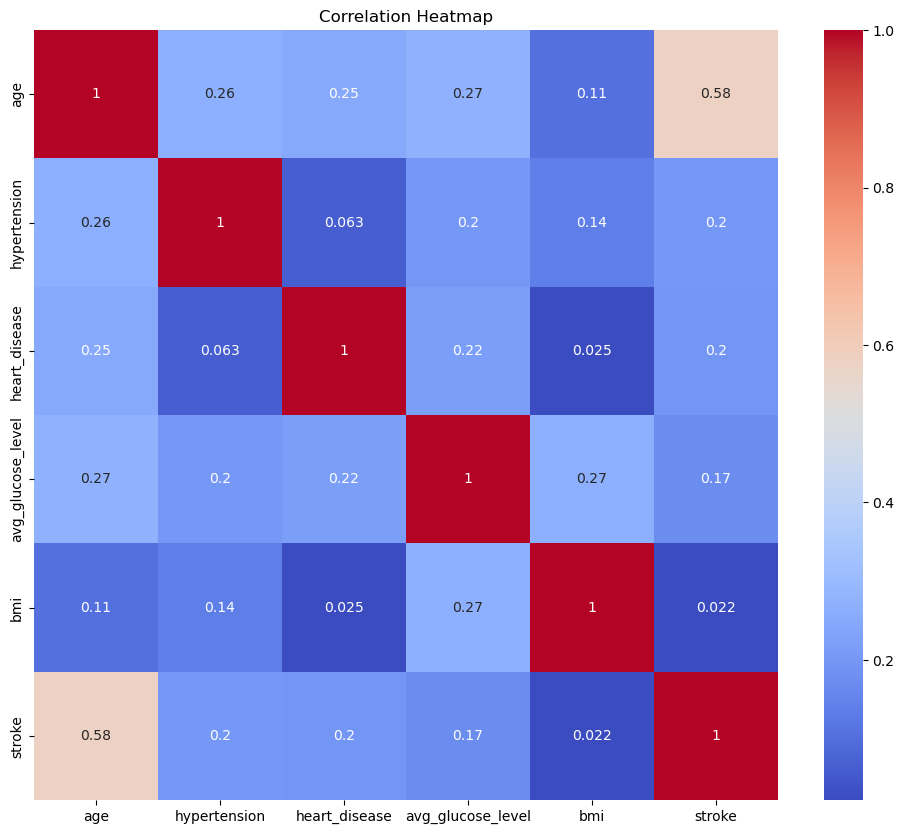

In [22]:

numeric_columns = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
numeric_data_csv = df[numeric_columns]
corr_matrix = numeric_data_csv.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

# Set the title and display the plot
plt.title("Correlation Heatmap")
plt.show()

### There is some correlation between having strokes and age, but there is no correlation with the other variables

## Key Findings:

The analysis of our data set concerning stroke incidence indicates that age is a significant predictor of stroke occurrence, with a noticeable increase in stroke cases among older individuals. The document reveals that while there is no strong direct correlation between stroke and other variables such as BMI, hypertension, heart disease, smoking status, or gender, the incidence of strokes tends to be higher among those with elevated average glucose levels. Descriptive statistics highlight an average age of 58 years among participants, with 20% having hypertension and 13% heart disease. Advanced graphical analyses show that females predominate in the dataset and that lifestyle or residence type does not strongly influence stroke risks. This suggests the importance of age and glucose management in stroke prevention efforts.

# 4. Model Building
As the majority of features are either categorical or nominal, modelling the data frame by regression may not be the best model. Also, the data do not seem to have the ability to differentiated into groups, so clustering may not the best model as the final model. Hence, we will use classification models. A decision tree will be constructed.

Accuracy: 0.7558139534883721
Confusion Matrix:
 [[22 10]
 [11 43]]


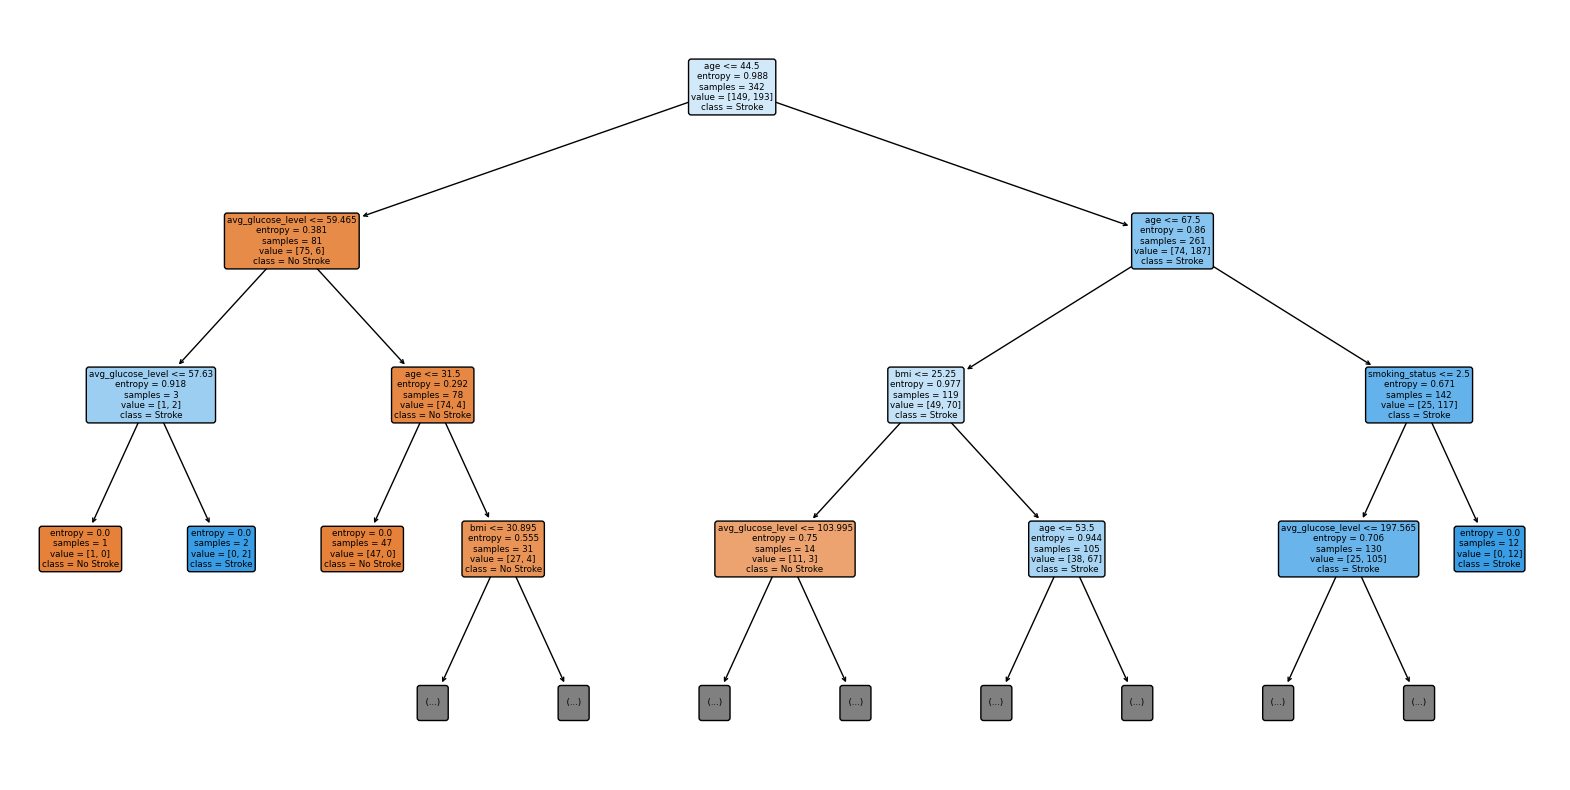

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

data = df
data.drop("id", axis=1, inplace=True)

categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])

X = data.drop('stroke', axis=1)
y = data['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

plt.figure(figsize=(20,10))
plot_tree(dt_classifier, filled=True, feature_names=list(X.columns), class_names=['No Stroke', 'Stroke'], rounded=True, max_depth=3)
plt.show()

#### The accuracy of the decision tree is above 75%, which is relatively acceptible for our analysis.
#### Also from the graph shown above, it can be seen that age is the most influencing feature besides average glucose level, and bmi. 

Accuracy: 0.7558139534883721
Confusion Matrix:
 [[22 10]
 [11 43]]


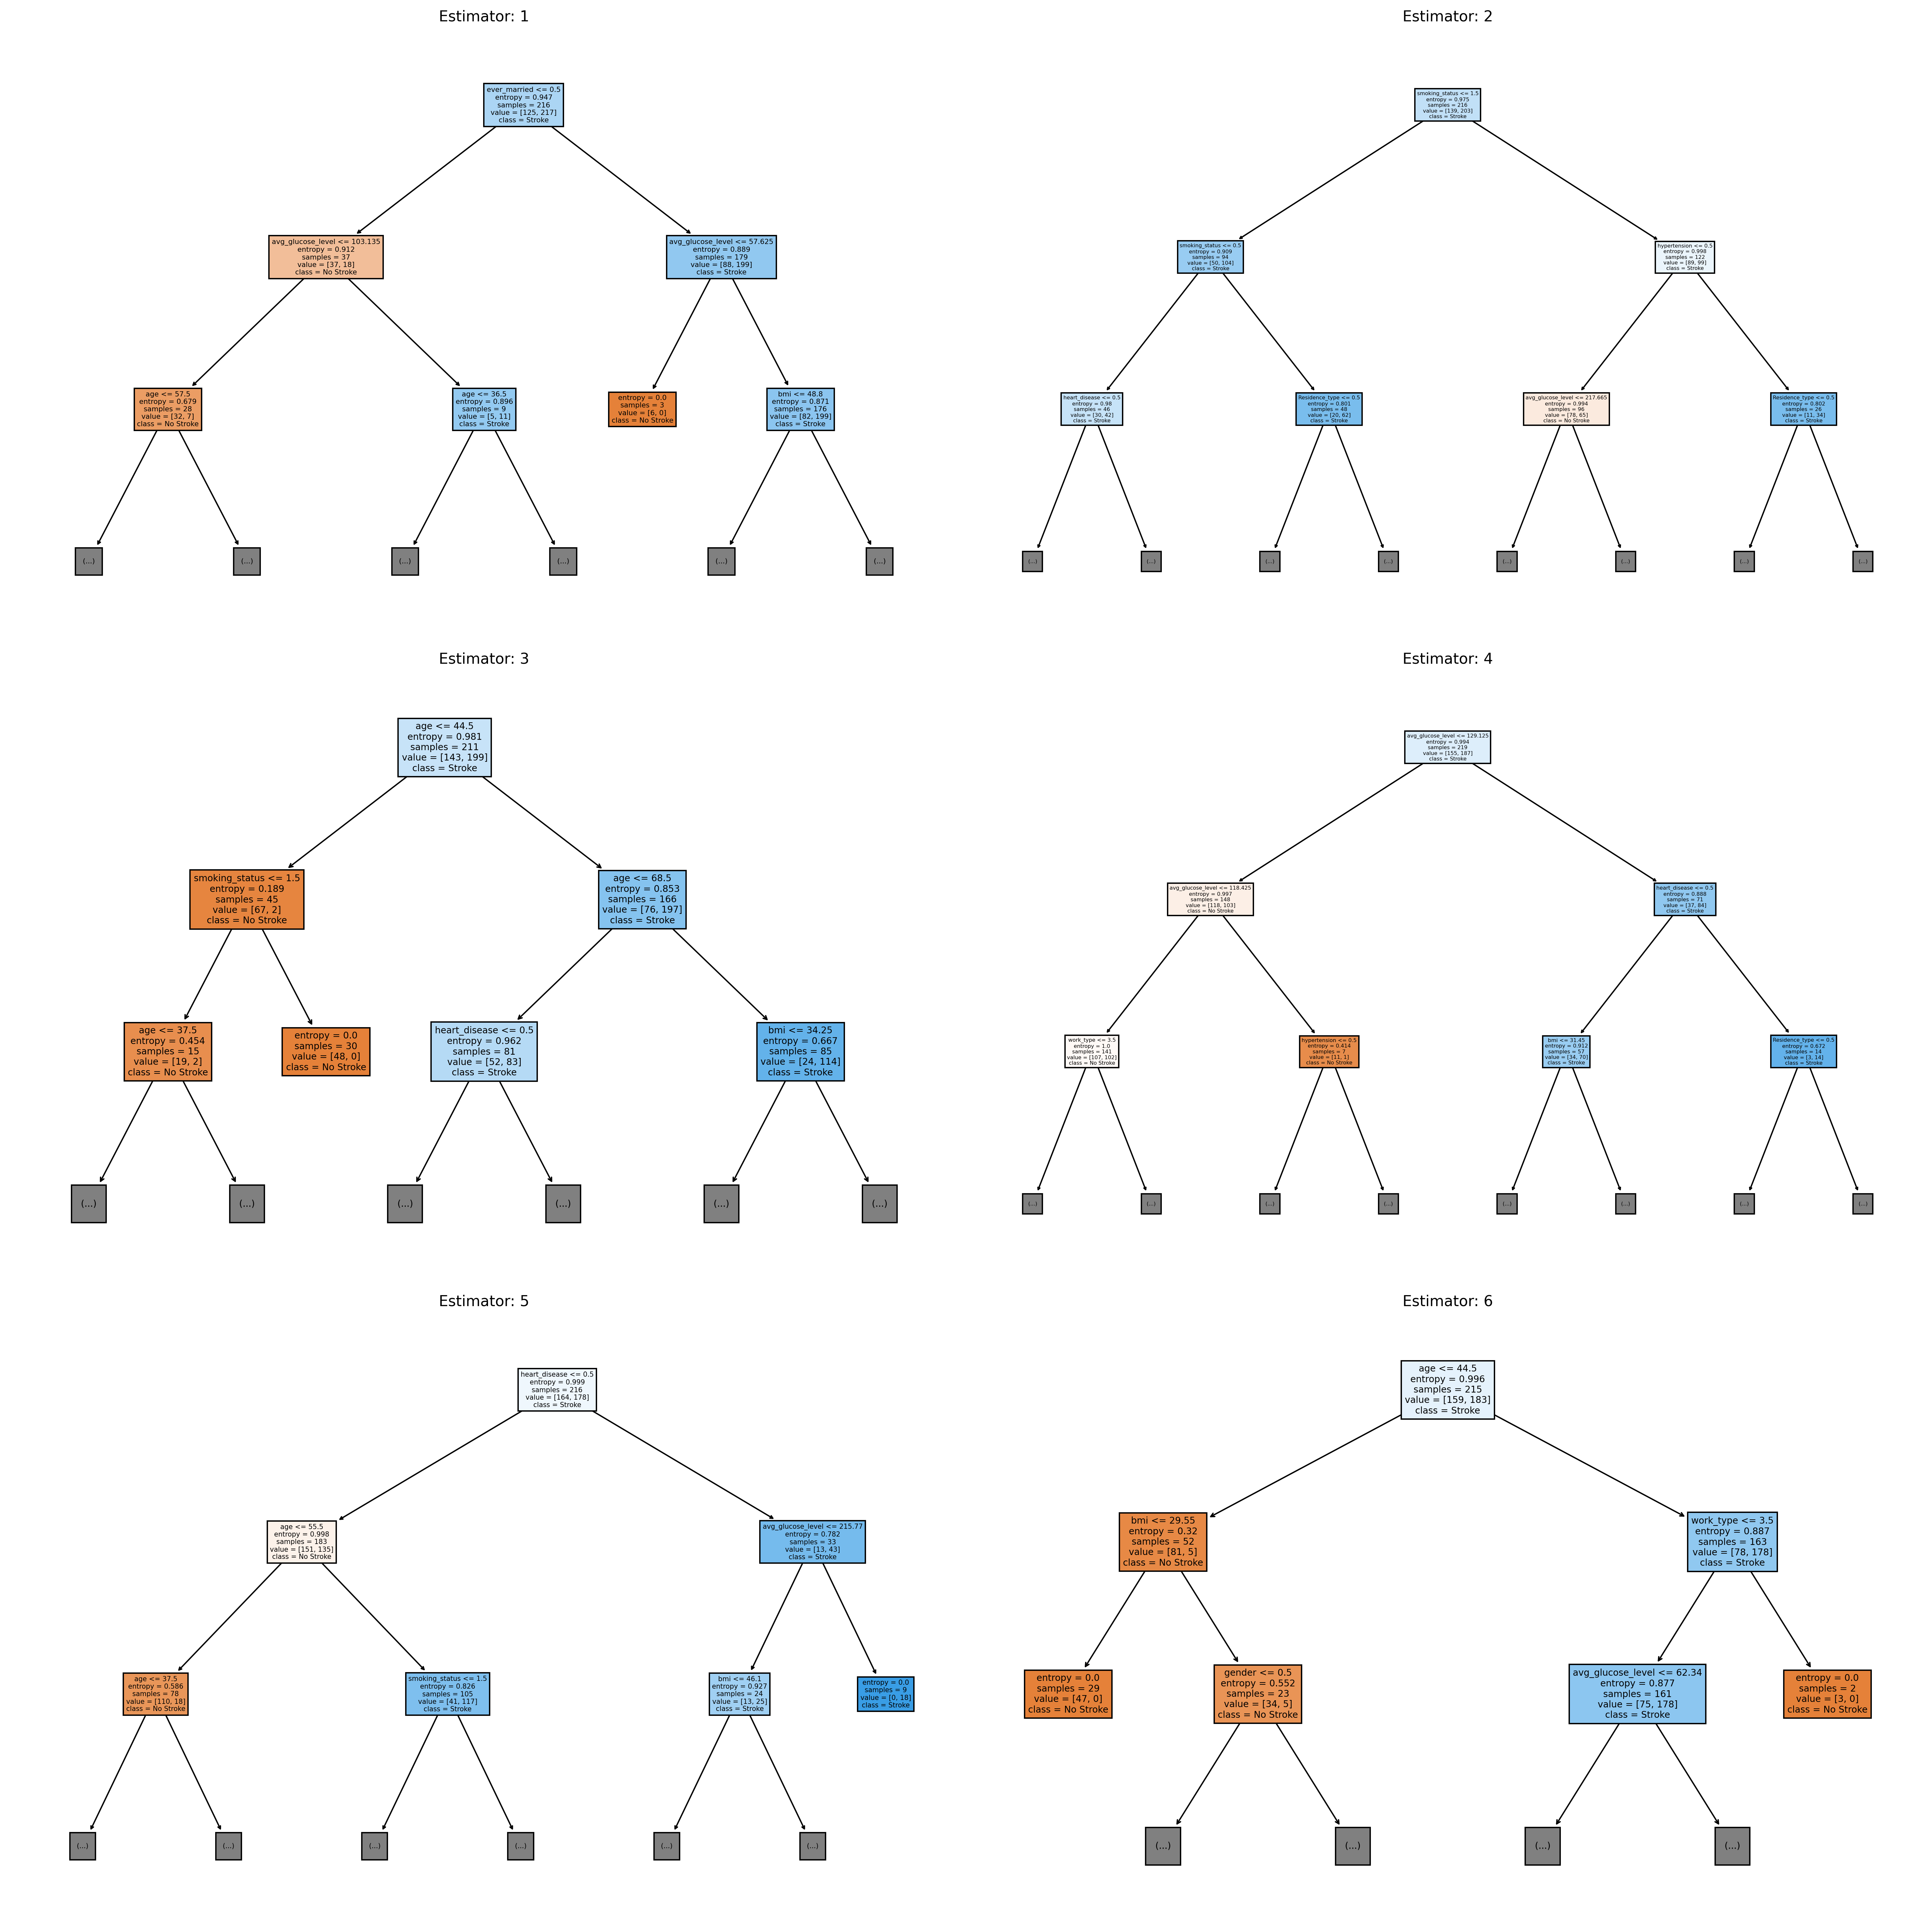

In [24]:
# random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree

# Load the data
data = df



categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])

# Prepare data for modeling
X = data.drop('stroke', axis=1)
y = data['stroke']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
rf = RandomForestClassifier(n_estimators=6, criterion='entropy', random_state=0)
rf.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

# Plot several trees from the forest
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 20), dpi=300)
for index, ax in enumerate(axes.flatten()):
    if index < len(rf.estimators_):
        tree = rf.estimators_[index]
        plot_tree(tree, feature_names=list(X.columns), class_names=['No Stroke', 'Stroke'], filled=True, max_depth=2, ax=ax)
        ax.set_title('Estimator: ' + str(index + 1), fontsize=11)
plt.tight_layout()
plt.show()


#### From the random forest above, it can be clearly seen that marital history, work type, Residence type do not have strong relationship with stroke incidences.

In [25]:
# selecting only numrical columns
numcolumns=df[["age","avg_glucose_level","bmi","hypertension","heart_disease"]]
X = numcolumns.values
y = df.iloc[:,-1].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(np.c_[X_train,y_train])

A_train = scaler.transform(np.c_[X_train,y_train])
X_train = A_train[:,:-1]
y_train = A_train[:,-1]

A_test = scaler.transform(np.c_[X_test,y_test])
X_test = A_test[:,:-1]
y_test = A_test[:,-1]

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression(fit_intercept=False).fit(X_train, y_train)
y_pred1 = reg1.predict(X_test)
print('The mean square error using OLS is:', mean_squared_error(y_test, y_pred1))


The mean square error using OLS is: 0.6605002383979445


#### By using regression we were able to develop a model with with relative small mean square error. However, it is not reliable because the majority of features as well as our output is either categorical or nominal.

## Interpretation:
In the model building phase of the project, decision tree and random forest classifiers were utilized to predict stroke incidence. The decision tree model, using entropy as a criterion, achieved an accuracy of about 75.6%, identifying age, average glucose level, and BMI as significant predictors. A random forest classifier corroborated these findings and further demonstrated that marital history, work type, and residence type had little impact on stroke risks. The approach of the random forest offered improved model reliability and reduced the risk of overfitting, making it a superior choice for this analysis. Regression was deemed unsuitable due to the categorical nature of many variables.Finally, clustering was not a suitable model for our data because it cant be differentiated into groups.

# 5. Summary and conclusion:
In conclusion, the analysis of our data revealed that age and average glucose levels are significant predictors of stroke occurrences, with older individuals and those with higher glucose levels at increased risk. Other factors such as BMI, hypertension, heart disease, and lifestyle elements like smoking status, marital history, and work type showed minimal direct correlation with stroke risks. In addition, advanced graphical analyses and modeling were conducted, including decision tree and random forest classifiers, which identified age and average glucose levels as significant predictors of stroke. The random forest model confirmed that marital history, work type, and residence type had minimal impact on stroke risk. Overall, these findings provide valuable insights into the various factors that could cause strokes, and understanding these connections could potintially reduce stroke incidences.

# Future recommendations:
1- Initiatives to monitor and manage glucose levels could be crucial in mitigating stroke risks, especially among older populations.
2- Older individuals, especially those above the age of 50, should be the focus of targeted health screenings for early detection and prevention of stroke.
3- Expanding the data set, and incorporating more detailed medical history and lifestyle data could improve model performance and uncover additional risk factors.


# 6.General Guidelines to Adopt Methodology:
We Adopted Guidelines in:

1.Selecting and Preparing Quality Data: Ensured the selection of a robust dataset while addressing data quality issues such as missing values and inconsistencies through thorough preprocessing.

2.Choosing Suitable Modeling Approaches: Selected appropriate predictive modeling techniques, specifically classification models like decision trees and random forests, to align with the data characteristics and project objectives.

3.Implementing Regular Model Evaluation: Established procedures for continuous evaluation and updating of the model to adapt to new data and emerging trends, ensuring ongoing relevance and accuracy.

# We faced challenges (problems) in:
1. Finding a suitable dataset that meets all the requirements assigned to us.
2. Poor data quality, including missing values and inconsistent data 
3. Finding relations between variables to compare them between each other.
4. Fixing faulty codes. 